In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns

%matplotlib inline

In [ ]:
def get_u(batch_size):
  return torch.rand(batch_size, 1)

In [ ]:
def get_n(batch_size):
  return torch.randn(batch_size, 1) + 5

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.main = nn.Sequential(
        nn.Linear(1, 32),
        nn.ReLU(),
        nn.Linear(32, 1)
    )
  def forward(self, x):
    return self.main(x)

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.main = nn.Sequential(
        nn.Linear(1, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
        nn.Sigmoid()
    )
  def forward(self, x):
    return self.main(x)

In [ ]:
gen = Generator()
disc = Discriminator()

In [ ]:
generator_optm = torch.optim.SGD(gen.parameters(), lr = 1e-3)
discriminator_optm = torch.optim.SGD(disc.parameters(), lr = 1e-3)

In [ ]:
def update_D(batch_size):
  real_samples = get_n(batch_size)
  prob_real_is_real = disc(real_samples)

  noise = get_u(batch_size)
  generated_samples = gen(noise)
  prob_fake_is_fake = 1 - disc(generated_samples)

  loss = (- torch.log(prob_real_is_real) - torch.log(prob_fake_is_fake)).mean()

  discriminator_optm.zero_grad()
  loss.backward()
  discriminator_optm.step()

  return loss.data.numpy().item()

In [ ]:
def update_G(batch_size):
  noise = get_u(batch_size)
  generated_samples = gen(noise)
  prob_fake_is_real = disc(generated_samples)

  loss = (- torch.log(prob_fake_is_real)).mean()

  generator_optm.zero_grad()
  loss.backward()
  generator_optm.step()

  return loss.data.numpy().item()

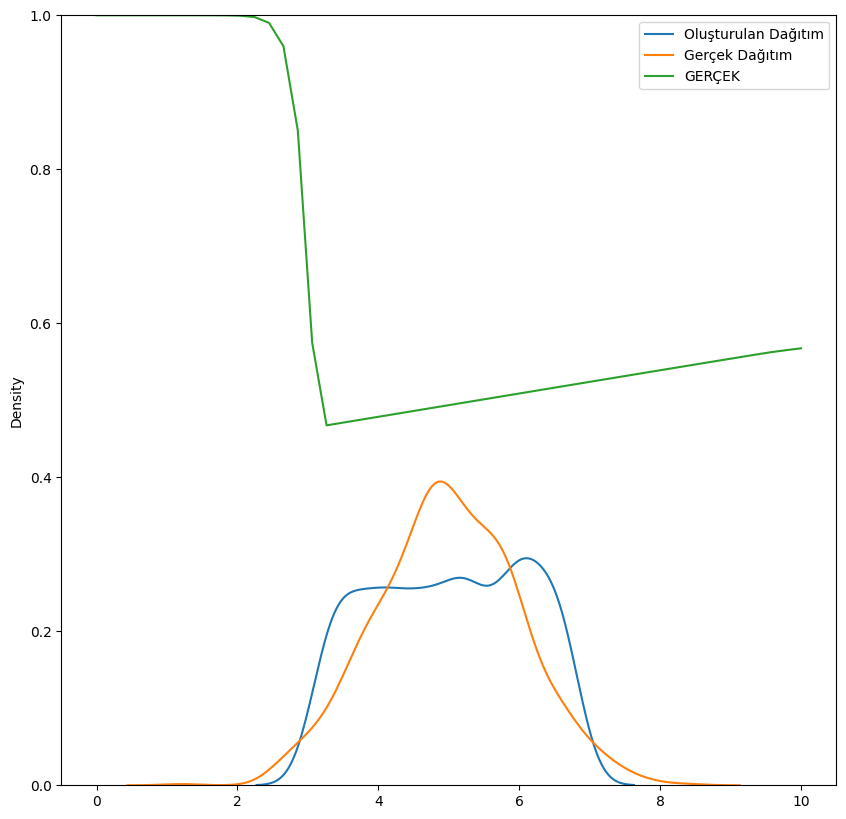

In [ ]:
N_DISC_OPERATIONS = 50
BATCH_SIZE = 64

for i in range(10000):
  for _ in range(N_DISC_OPERATIONS):
    update_D(BATCH_SIZE)
  update_G(BATCH_SIZE)

  if i % 300 == 0:
    clear_output(True)
    plt.figure(figsize = (10, 10))

    sns.kdeplot(gen(get_u(1000)).data.numpy()[:, 0], label = 'Oluşturulan Dağıtım')
    sns.kdeplot(get_n(1000).data.numpy()[:, 0], label = 'Gerçek Dağıtım')

    x = np.linspace(0, 10, dtype = 'float32')
    p_real = disc(torch.from_numpy(x[:, None]))
    plt.plot(x, p_real.data.numpy(), label = 'GERÇEK')

    axes = plt.gca()
    axes.set_ylim([0, 1])

    plt.legend()
    plt.show()
